In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
## loading datasets
anime_df = pd.read_csv('../input/anime-recommendations-database/anime.csv')
anime_df.head()

In [ ]:
rating_df = pd.read_csv('../input/anime-recommendations-database/rating.csv')

In [ ]:
rating_df.head()

## Getting know the dataset better

In [ ]:
anime_df.describe()

So we have around 13K animes that are part of the dataset, however it seems like there are couple hundred animes that went unrated, and we have a average rating around ~6.5

## Computing the number of times each anime was rated

In [ ]:
times_rated = rating_df.groupby(['anime_id'])['rating'].count()
times_rated = times_rated.rename('times_rated')

In [ ]:
times_rated.describe()

So every anime was rated atleast one time, or it could be a placeholder as well, and on average an anime is rated around 700 times

## Adding the times rated info to rating dataframe & combining with anime dataframe

In [ ]:
rating_df = rating_df.merge(times_rated,on='anime_id')

In [ ]:
## selecting top 50% rated animes
rating_df_top50 = rating_df[rating_df['times_rated']>51]

In [ ]:
rating_df_top50[['rating','times_rated']].describe()

In [ ]:
anime_rating_df = anime_df.merge(rating_df_top50,on='anime_id')

In [ ]:
anime_rating_df.head()

In [ ]:
anime_pivot_df = pd.pivot_table(index='name',columns='user_id',values='rating_y', data=anime_rating_df)

anime_pivot_df.fillna(value=0,inplace=True)

In [ ]:
anime_pivot_df.head()

## Converting the dataframe to sparse matrix for modelling

In [ ]:
from scipy.sparse import csr_matrix
anime_mat = csr_matrix(anime_pivot_df.values)

## Using Cosine Similarity Nearest Neighbors for Clustering Similar Animes
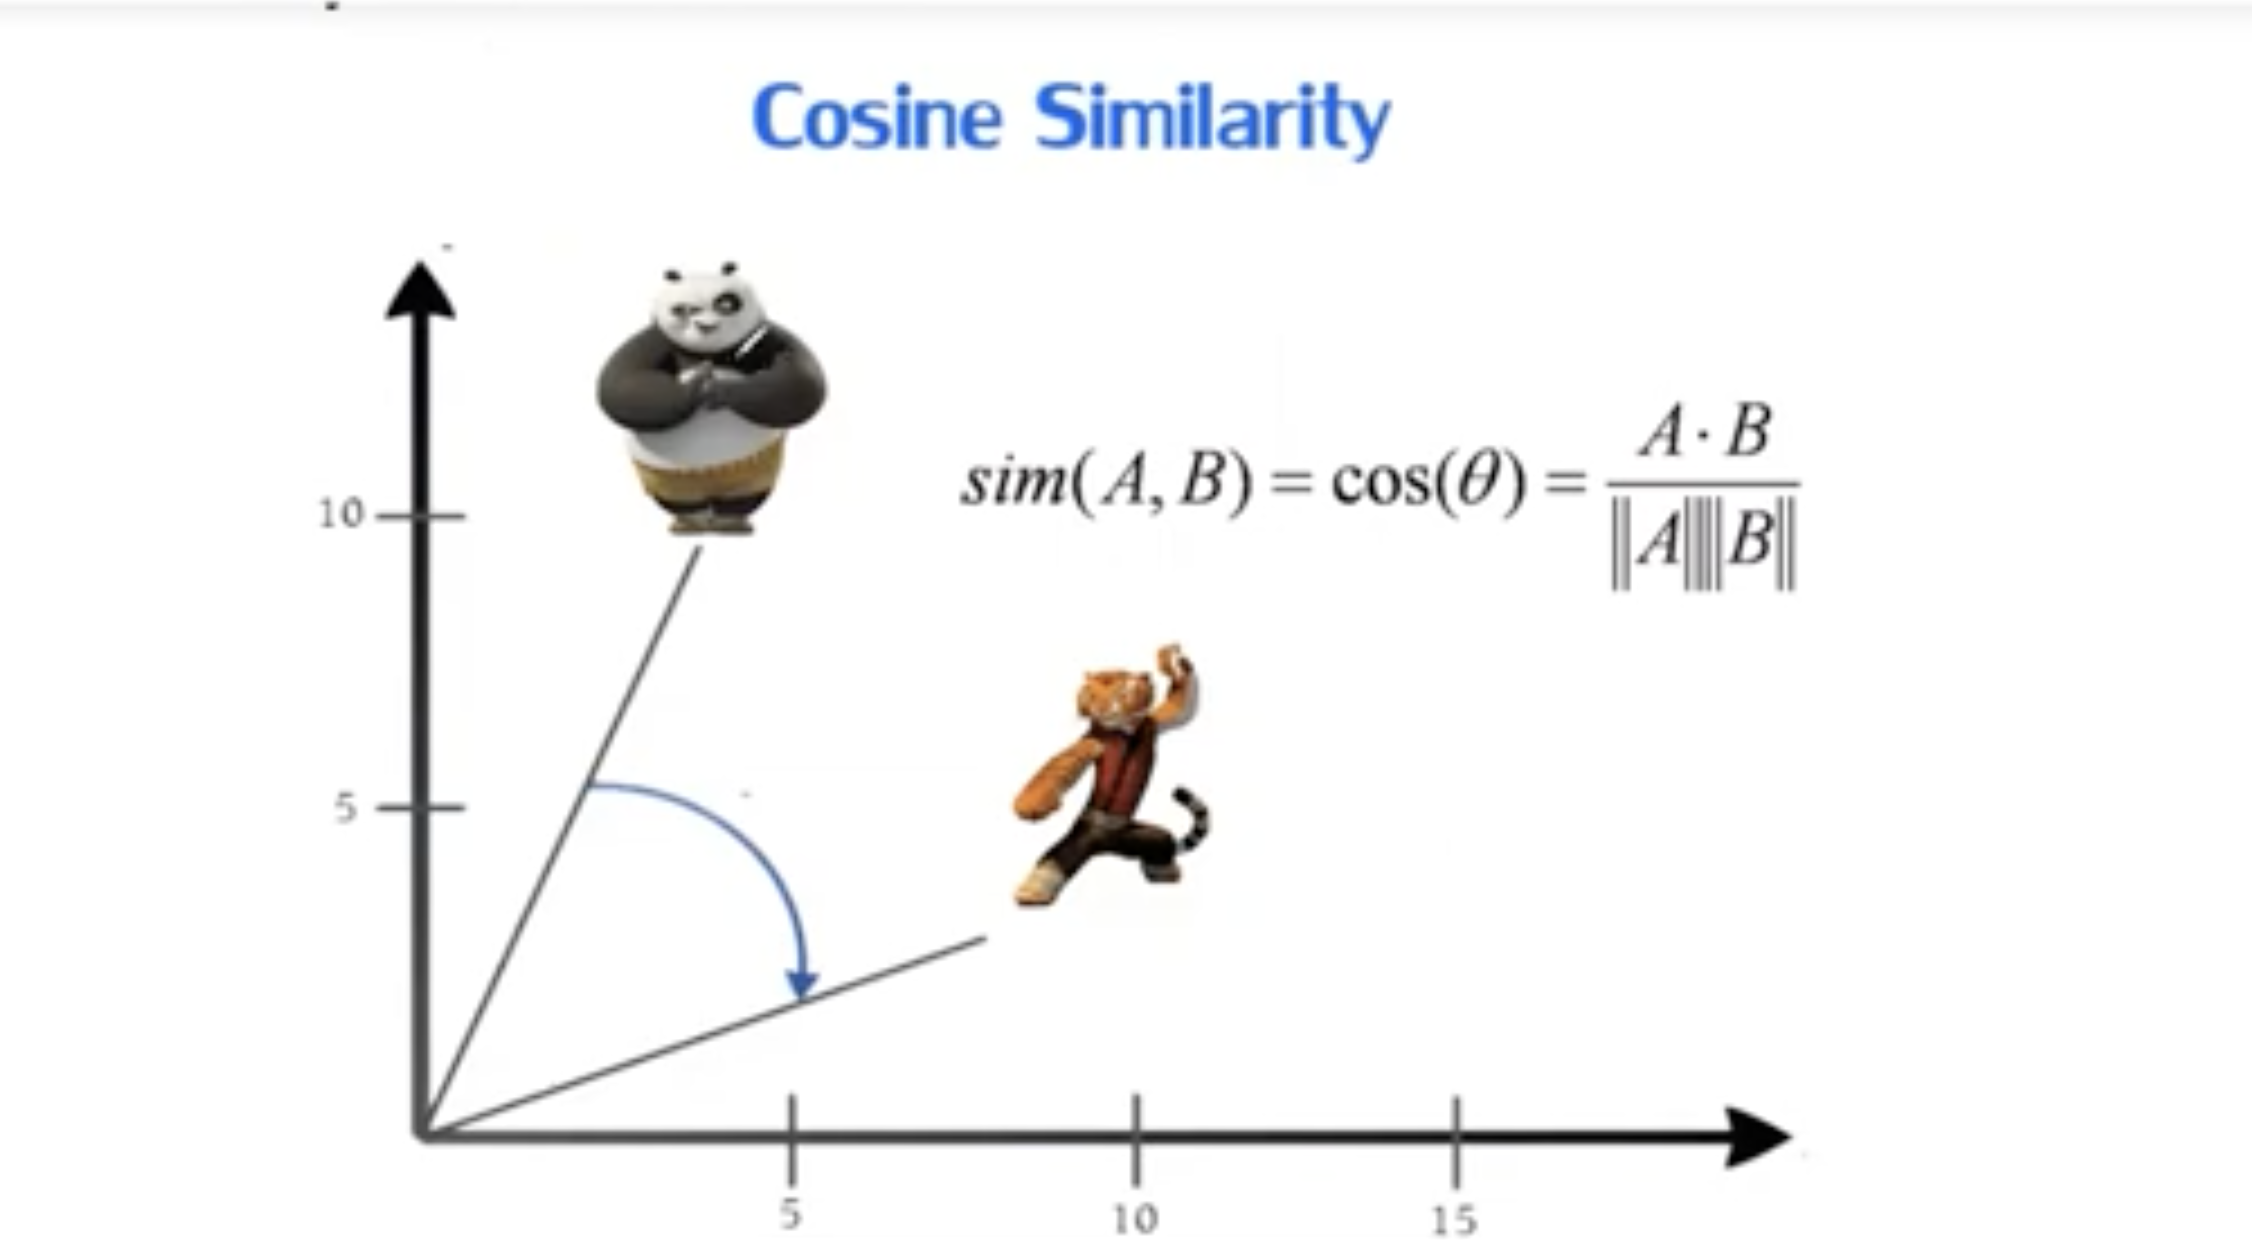

Here each movie is a vector, and we find the similarity between each movies then cluster the similar together for 
recommendations

In [ ]:
from sklearn.neighbors import NearestNeighbors
anime_nbrs = NearestNeighbors(metric='cosine', algorithm='auto').fit(anime_mat)
distances, indices = anime_nbrs.kneighbors(anime_mat)

## Selecting my favorite Anime *'Kimi no Na wa.'*

In [ ]:
## creating list for anime names
anime_names = list(anime_pivot_df.index)

In [ ]:
kimi_no_nawa_index = anime_names.index('Kimi no Na wa.')
distances, indices = anime_nbrs.kneighbors(anime_pivot_df.iloc[kimi_no_nawa_index,:].values.reshape(1,-1),n_neighbors=6)

In [ ]:
indices_flat, distances_flat = indices.flatten(),distances.flatten()
for index,anime_index in enumerate(indices_flat):
    anime_name = anime_names[anime_index]
    if(index == 0): 
        print(f'Animes similar to {anime_name}:')
    else:
        print(f'\t {anime_name} with score ---> {distances_flat[index]}')